the dataset provided is the dataset regarding the credit card fraud detection

# Importing imp **libraries**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report


#  1. load data using pandas dataframe

In [36]:
# loading the dataset to a Pandas DataFrame
data = pd.read_csv('/content/creditcard.csv')

In [37]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0




---



---






#                   ***2. DATA PREPROCESSING***

---




---



# 2.1 UNDERSTANDING DATA

In [38]:
# first 5 rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
# last 5 rows of the dataset
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [40]:
# dataset informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [41]:
len(data)

284807

In [42]:
data.shape

(284807, 31)

In [43]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [44]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [45]:
# distribution of legit transactions & fraudulent transactions
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# 2.2 Missing value treatment

In [46]:
# checking the number of missing values in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [47]:
data.isnull().values.any()

False

their is no missing value in dataset

# 2.3 duplicate value treatment

In [48]:
# Check if any duplicate rows exist in the dataframe
duplicates_exist = data.duplicated().any()
print('Duplicate rows exist:', duplicates_exist)

Duplicate rows exist: True


In [49]:
data.duplicated().sum()

1081

In [50]:
# dataset.drop_duplicates(dataset,inplace=True)
data.drop_duplicates(inplace=True)

handle the duplicates by removing duplicates

# 2.4 EDA

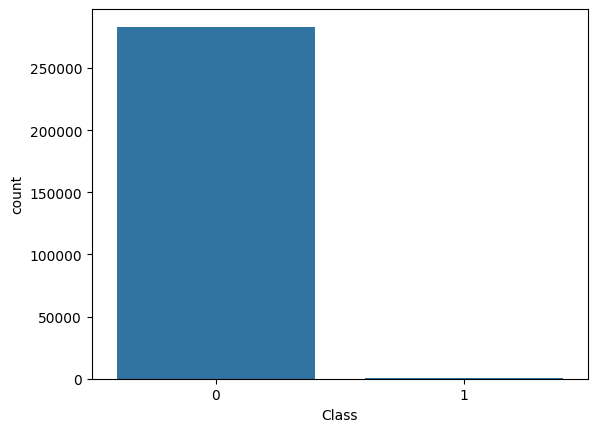

In [51]:
#check all classes into normal and fraud data
sns.countplot(x='Class', data=data)
plt.show()


from graph we can easily see that their is very large difference between  the normal and fraud transaction so we need to balnce out them

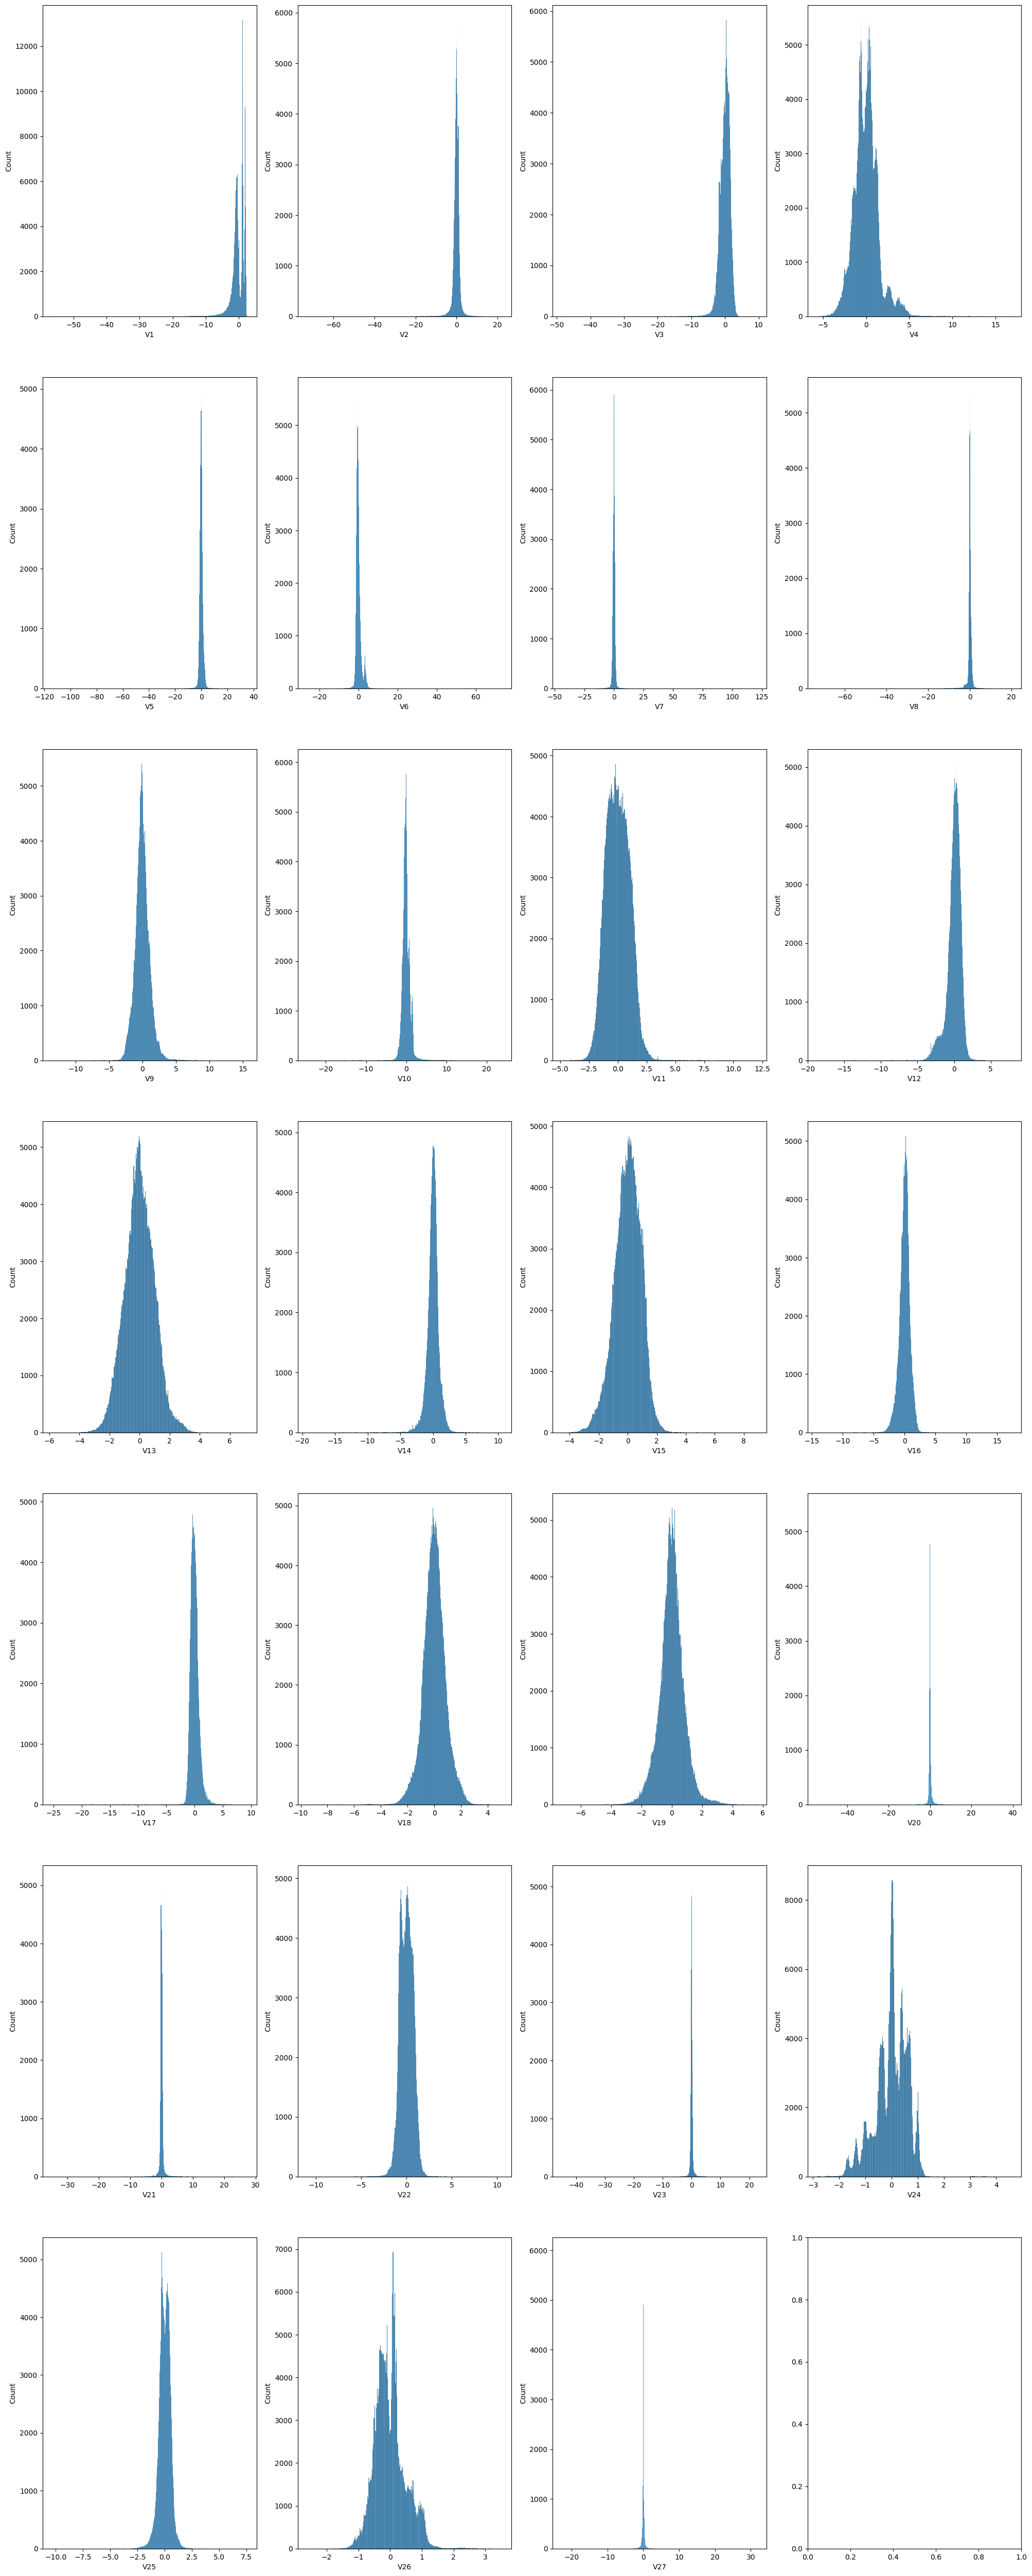

In [52]:
temp = data.drop(columns=['Time', 'Amount', 'Class','V28'], axis=1)

# create hist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in temp.columns:
    sns.histplot(temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

<Axes: xlabel='Time', ylabel='Count'>

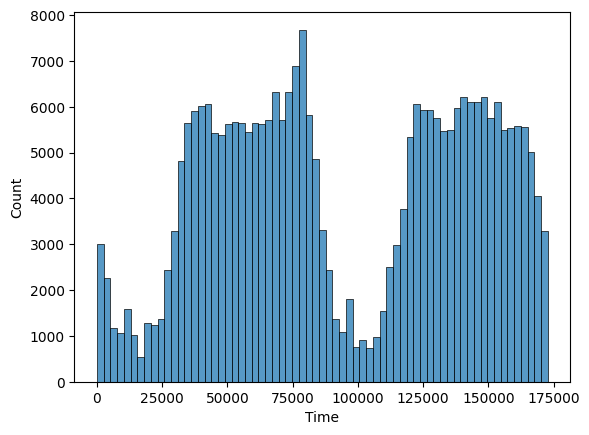

In [53]:
#checking time
sns.histplot(data['Time'])

<ipython-input-54-c580367987f2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Amount'])


<Axes: xlabel='Amount', ylabel='Density'>

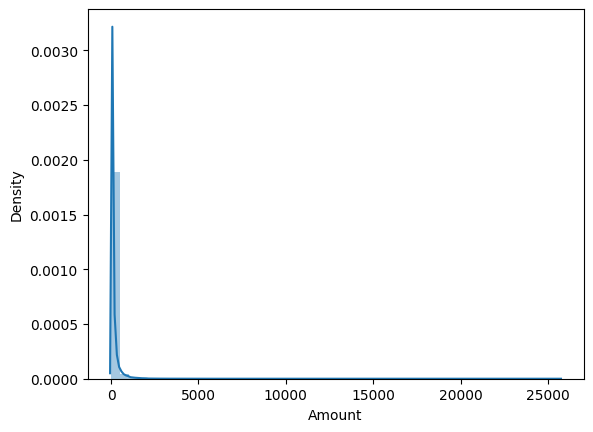

In [54]:

# checking amount data
sns.distplot(data['Amount'])

Fraudulent Cases: 473
Valid Transactions: 283253
Proportion of Fraudulent Cases: 0.001667101358352777


<Axes: ylabel=' '>

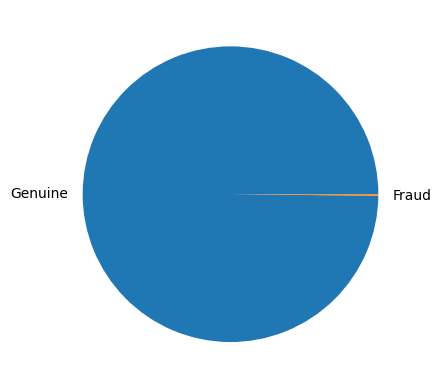

In [55]:
# check for relative proportion
print("Fraudulent Cases: " + str(len(data[data["Class"] == 1])))
print("Valid Transactions: " + str(len(data[data["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(data[data["Class"] == 1])/ data.shape[0]))

# To see how small are the number of Fraud transactions
data_p = data.copy()
data_p[" "] = np.where(data_p["Class"] == 1 ,  "Fraud", "Genuine")

# plot a pie chart
data_p[" "].value_counts().plot(kind="pie")

this pie chart show direct difference between the fraud and normal transaction

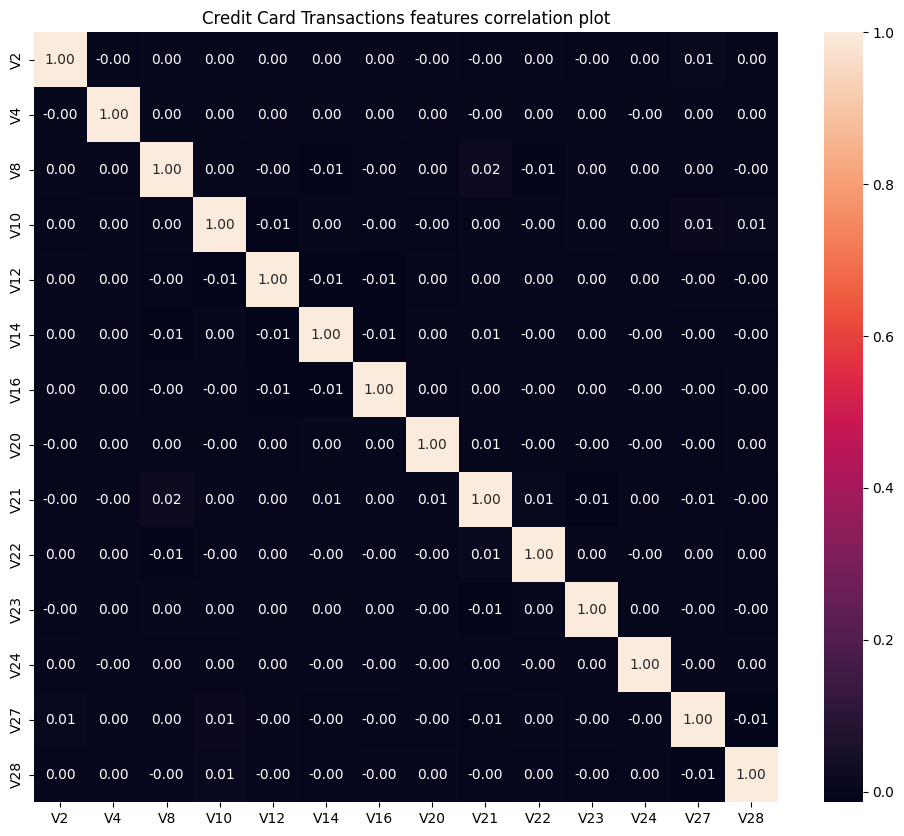

In [56]:
#created a haet map of data
selected_features = ['V2', 'V4', 'V8', 'V10', 'V12', 'V14', 'V16', 'V20', 'V21', 'V22', 'V23', 'V24', 'V27', 'V28']

plt.figure(figsize=(12, 10))
sns.heatmap(data[selected_features].corr(), annot=True, fmt=".2f")
plt.title('Credit Card Transactions features correlation plot')
plt.show()

The diagonal elements have a value of 1, indicating perfect correlation of a feature with itself. Most of the off-diagonal elements have values close to 0, suggesting low or no correlation between most feature pairs. However, there are some feature pairs with moderate positive or negative correlations, as indicated by values closer to 1 or -1

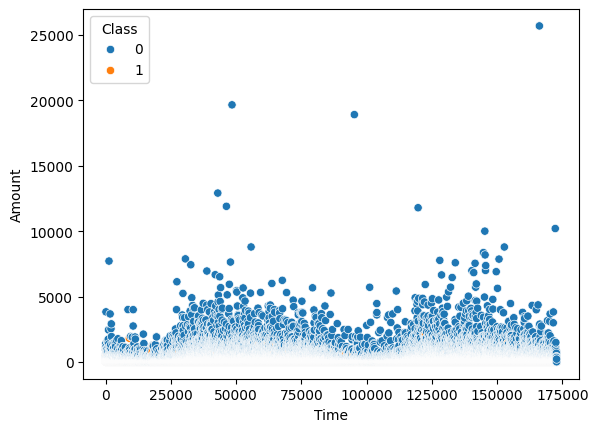

In [57]:
#scatter plot of time and amount with class
sns.scatterplot(data=data, x="Time", y="Amount", hue="Class")
plt.show()

scatter plot tell about the outlier value into the time and amout coloun so we need to handle this also

# Seperating Normal and Fraud Transaction

0 --> Normal Transaction

1 --> fraudulent transaction

seperating normal and fraud transation from class

In [58]:
# separating the data for analysis
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [59]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [60]:
#checking details of legit or normal transaction
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [61]:
#checking details of fraud transaction
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [62]:
# compare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


# feature engenerring

In [63]:
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))

temp = data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(temp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()


,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3929,255825.95,65.112230,12.990,45961.838558
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2211,145744.59,65.917951,23.000,20085.295527
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1552,106983.39,68.932597,17.985,45434.509936


change time  to remove outlier for better result and increse the accuracy of the trained model

<ipython-input-83-24f93df50048>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=fig)


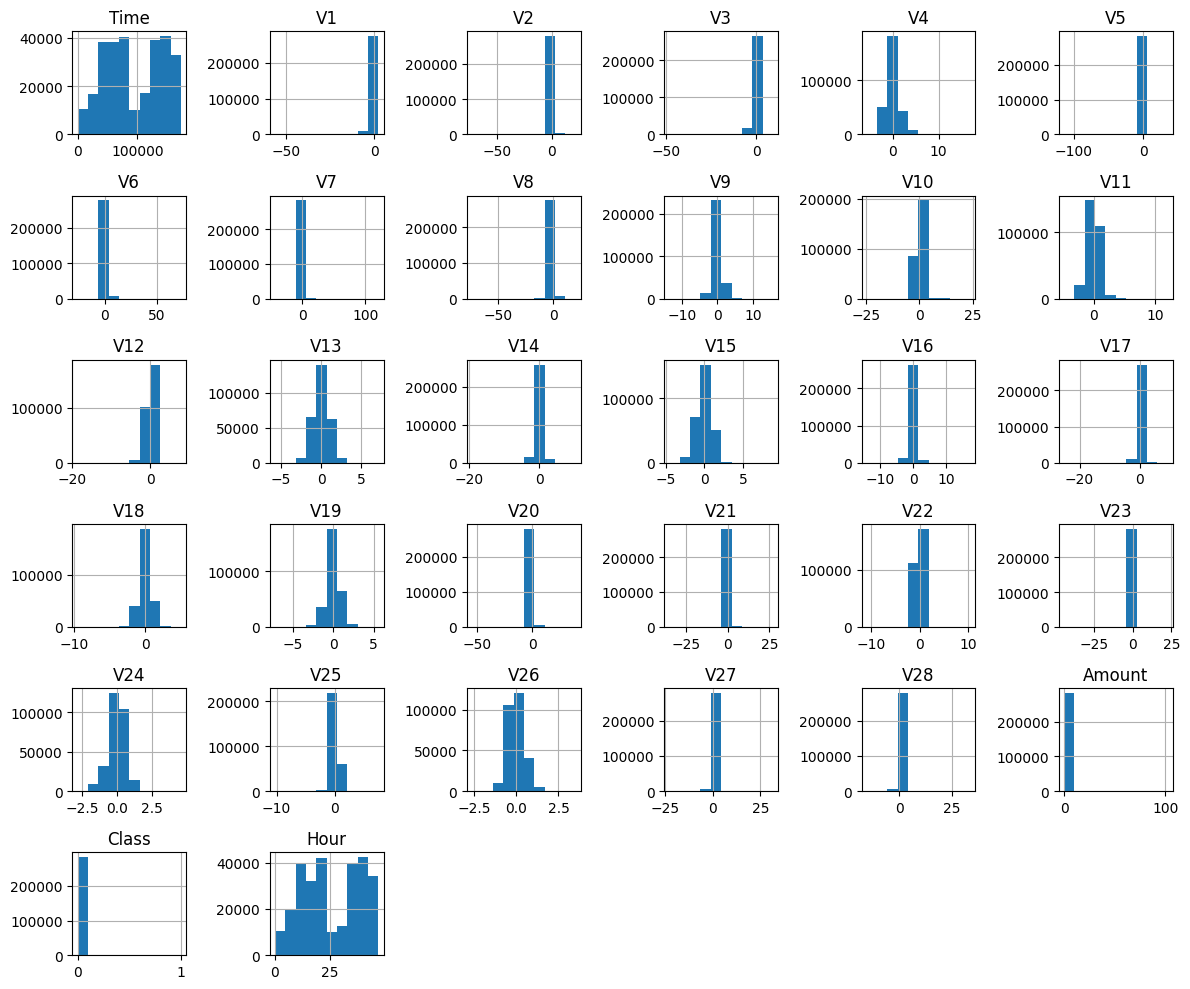

In [83]:
# Plot histogram of each feature
fig = plt.figure(figsize=(12,10))
data.hist(ax=fig)
plt.tight_layout()

# standard scaling(feature engineering)

In [64]:
sc=StandardScaler()
data['Amount'] = sc.fit_transform(data['Amount'].values.reshape(-1, 1))
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0,0.0


### by standard scaling the outlier value of the amount resolve

# split classes (feature engineering)

In [65]:
X = data.drop(columns='Class', axis=1)
Y = data['Class']

In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [87]:
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 283726 entries, 0 to 284806
Series name: Class
Non-Null Count   Dtype
--------------   -----
283726 non-null  int64
dtypes: int64(1)
memory usage: 4.3 MB




# Split into train and test data

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# 3. model traning

# and HANDLING IMBALANCE DATASET usng smote

# smote

In [67]:
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(X_train, Y_train)


<ipython-input-68-9eece4b2f253>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_train, palette='viridis')


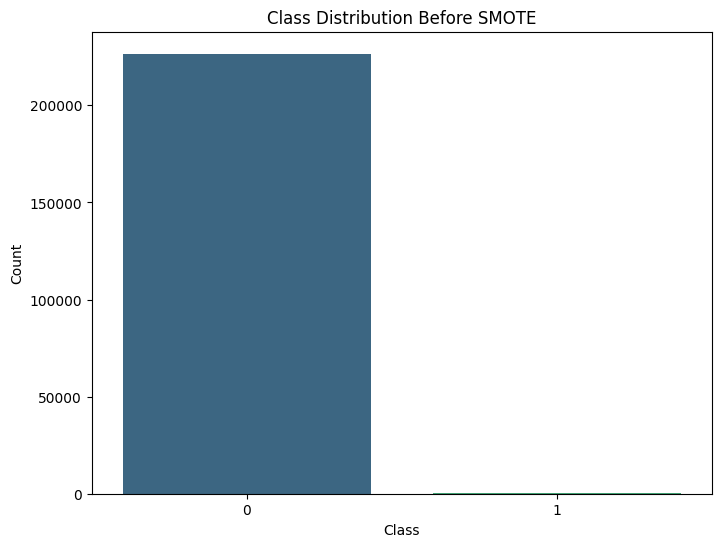

<ipython-input-68-9eece4b2f253>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_smote, palette='viridis')


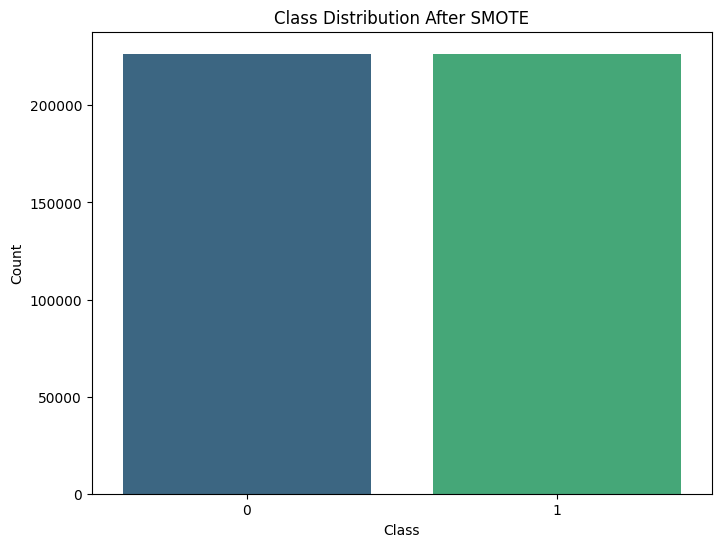

In [68]:
# differennce of class before and after the smote

import matplotlib.pyplot as plt
import seaborn as sns

# Before SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=Y_train, palette='viridis')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# After SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_smote, palette='viridis')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# LOGISTIC REGRESSION

In [88]:
modellg = LogisticRegression()
# training
modellg.fit(x_smote, y_smote)
# testing
Y_predlg = modellg.predict(X_test)
print(classification_report(Y_test, Y_predlg))
print("F1 Score:",f1_score(Y_test, Y_predlg))
print("acuuracy:",accuracy_score(Y_test, Y_predlg))
print("precision",precision_score(Y_test, Y_predlg))
print("recall",recall_score(Y_test, Y_predlg))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.07      0.87      0.13        95

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.56     56746
weighted avg       1.00      0.98      0.99     56746

F1 Score: 0.12779060816012316
acuuracy: 0.9800338349839637
precision 0.06893687707641195
recall 0.8736842105263158


Confusion matrix:
[[55530  1121]
 [   12    83]]


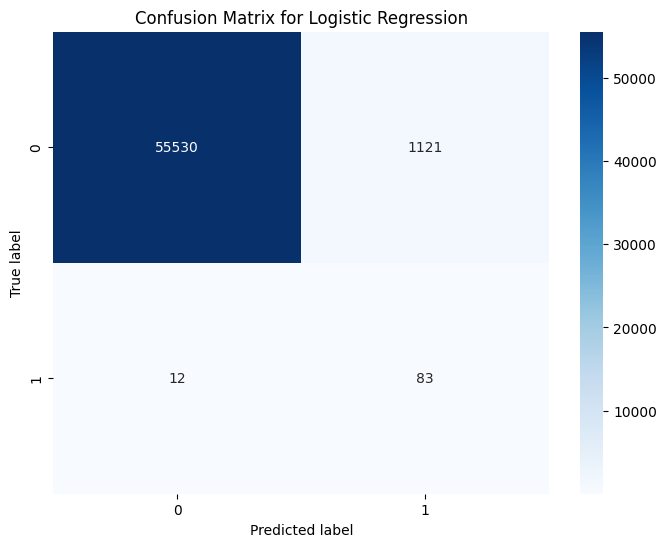

In [71]:
# confusion matrix of logistic regression

from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_predlg)

# Print confusion matrix
print("Confusion matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


The model correctly identified 55530 non-fraudulent transactions (True Negatives).

The model incorrectly classified 12 fraudulent transactions as non-fraudulent (False Negatives).

The model correctly identified 83 fraudulent transactions (True Positives).

The model incorrectly classified 1121 non-fraudulent transactions as fraudulent (False Positives)

# RANDOM FOREST

In [72]:
modelrf = RandomForestClassifier()
modelrf.fit(x_smote, y_smote)
Y_predrf = modelrf.predict(X_test)
print(classification_report(Y_test, Y_predrf))
print("F1 Score:",f1_score(Y_test, Y_predrf))
print("acuuracy:",accuracy_score(Y_test, Y_predrf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.78      0.83        95

    accuracy                           1.00     56746
   macro avg       0.95      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746

F1 Score: 0.8314606741573033
acuuracy: 0.9994713283755683


Confusion matrix:
[[56642     9]
 [   21    74]]


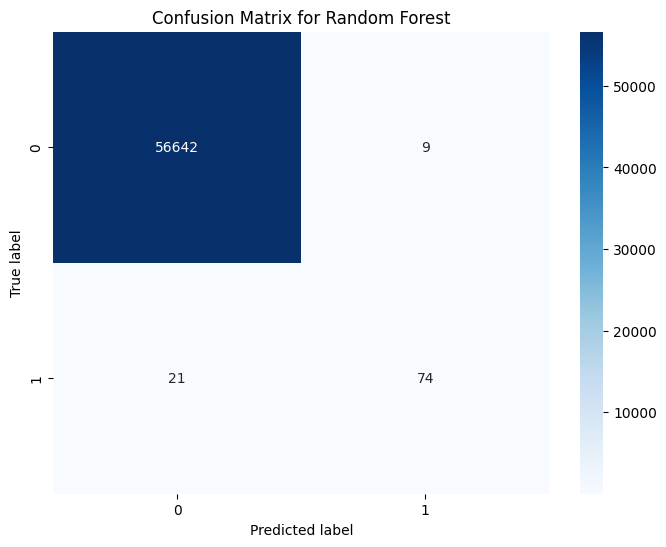

In [74]:
#  confusion matrix of random forest

cm = confusion_matrix(Y_test, Y_predrf)

# Print confusion matrix
print("Confusion matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix for Random Forest")
plt.show()


The model correctly identified 56642non-fraudulent transactions (True Negatives).

The model incorrectly classified 21 fraudulent transactions as non-fraudulent (False Negatives).

The model correctly identified 74 fraudulent transactions (True Positives).

The model incorrectly classified 9 non-fraudulent transactions as fraudulent (False Positives

# XGB CLASSIFIER

In [75]:
from xgboost import XGBClassifier
modelxc = XGBClassifier(n_jobs=-1)
# training
modelxc.fit(x_smote, y_smote)
# testing
Y_predxc = modelxc.predict(X_test)
print(classification_report(Y_test, Y_predxc))
print("F1 Score:",f1_score(Y_test, Y_predxc))
print("acuuracy:",accuracy_score(Y_test, Y_predxc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.82      0.83      0.83        95

    accuracy                           1.00     56746
   macro avg       0.91      0.92      0.91     56746
weighted avg       1.00      1.00      1.00     56746

F1 Score: 0.8272251308900523
acuuracy: 0.9994184612131252


Confusion matrix:
[[56634    17]
 [   16    79]]


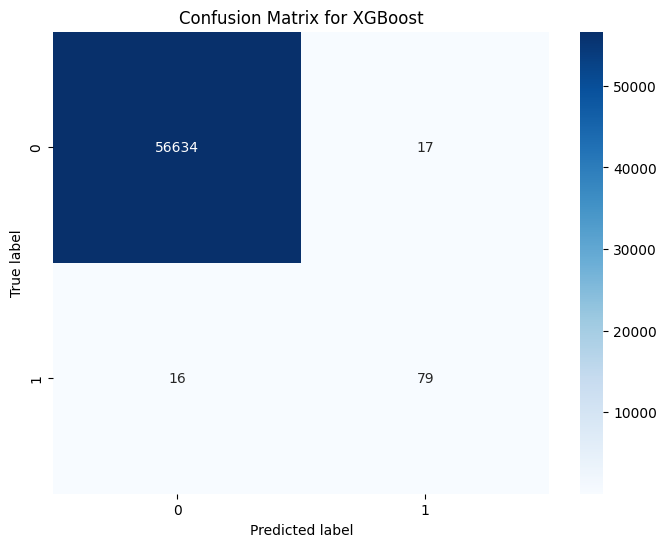

In [77]:
# confusion matrix of xcboost

cm = confusion_matrix(Y_test, Y_predxc)

# Print confusion matrix
print("Confusion matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix for XGBoost")
plt.show()


The model correctly identified 56634 non-fraudulent transactions (True Negatives).

The model incorrectly classified 16 fraudulent transactions as non-fraudulent (False Negatives).

The model correctly identified 79 fraudulent transactions (True Positives).

The model incorrectly classified 17 non-fraudulent transactions as fraudulent (False Positives)

# **best model for data**

In [79]:
#finding best model using f1 score

models = [modellg, modelrf, modelxc]
f1_scores = [f1_score(Y_test, modellg.predict(X_test)), f1_score(Y_test, modelrf.predict(X_test)), f1_score(Y_test, modelxc.predict(X_test))]

best_model_index = np.argmax(f1_scores)
best_model = models[best_model_index]

print("Best Model:", best_model.__class__.__name__)
print("Best f1 Score:", f1_scores[best_model_index])


Best Model: RandomForestClassifier
Best f1 Score: 0.8314606741573033


### acc to above observation we can easily saw that from  random forest perform better result and giving better result  comparative to other model

random forest is the best model for the data set





# hyperparameter tuning of random forest for better result

In [ ]:
# using grid cv for hyper tuning for detting better result
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [10, 50, 100, 200], 'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)


{'criterion': 'gini', 'n_estimators': 50}


so we got gini as criterion and 50 as n_estimator so we can apply into the model for better resut of the model

In [81]:
#use best hyper parameter into  the model for better  result

model = RandomForestClassifier(n_estimators=50, criterion='gini')
model.fit(x_smote, y_smote)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("F1 Score:",f1_score(Y_test, Y_pred))
print("acuuracy:",accuracy_score(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.78      0.83        95

    accuracy                           1.00     56746
   macro avg       0.95      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746

F1 Score: 0.8314606741573033
acuuracy: 0.9994713283755683


after hypertuning thier is improvment into the result of the model

### acc. to project success acuraccy is more than 80% and hyperparameter tuning done